<a href="https://colab.research.google.com/github/LeHoangNhuan/ROBOT_H-N/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
doday= ctrl.Antecedent(np.arange(0, 30.1, 1), 'doday')
kichthuockheho= ctrl.Antecedent(np.arange(0,10.1,0.1),'kichthuockheho')
donghan= ctrl.Consequent(np.arange(50, 251, 1),'donghan')
tocdohan= ctrl.Consequent(np.arange(0, 21, 1), 'tocdohan')

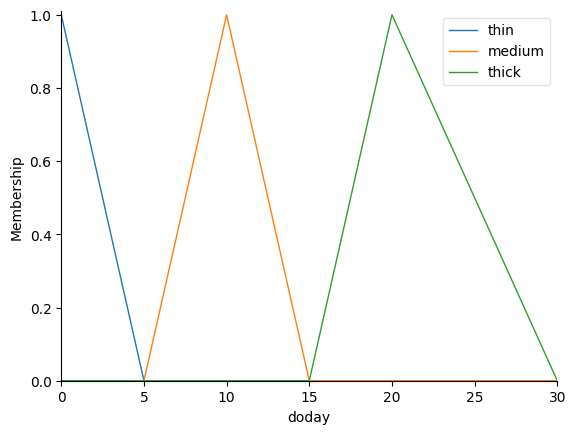

In [20]:
doday['thin']=fuzz.trimf(doday.universe,[0,0,5])
doday['medium']=fuzz.trimf(doday.universe,[5,10,15])
doday['thick']=fuzz.trimf(doday.universe,[15,20,30])
doday.view()

In [6]:
kichthuockheho['small']=fuzz.trimf(kichthuockheho.universe,[0,0,4])
kichthuockheho['medium']=fuzz.trimf(kichthuockheho.universe,[2,5,8])
kichthuockheho['large']=fuzz.trimf(kichthuockheho.universe,[6,10,10])

In [7]:
donghan['low']=fuzz.trimf(donghan.universe,[0,50,100])
donghan['medium']=fuzz.trimf(donghan.universe,[50,100,150])
donghan['high']=fuzz.trimf(donghan.universe,[150,200,250])

In [8]:
tocdohan['slow']=fuzz.trimf(tocdohan.universe,[0,0,4])
tocdohan['medium']=fuzz.trimf(tocdohan.universe,[2,5,8])
tocdohan['fast']=fuzz.trimf(tocdohan.universe,[6,20,20])

In [24]:
rule_tocdo_1 = ctrl.Rule(doday['thin'] & kichthuockheho['small'], tocdohan['fast'])
rule_tocdo_2 = ctrl.Rule(doday['thin'] & kichthuockheho['medium'], tocdohan['medium'])
rule_tocdo_3 = ctrl.Rule(doday['thin'] & kichthuockheho['large'], tocdohan['slow'])
rule_tocdo_4 = ctrl.Rule(doday['medium'] & kichthuockheho['small'], tocdohan['fast'])
rule_tocdo_5 = ctrl.Rule(doday['medium'] & kichthuockheho['medium'], tocdohan['medium'])
rule_tocdo_6 = ctrl.Rule(doday['medium'] & kichthuockheho['large'], tocdohan['slow'])
rule_tocdo_7 = ctrl.Rule(doday['thick'] & kichthuockheho['small'], tocdohan['medium'])
rule_tocdo_8 = ctrl.Rule(doday['thick'] & kichthuockheho['medium'], tocdohan['medium'])
rule_tocdo_9 = ctrl.Rule(doday['thick'] & kichthuockheho['large'], tocdohan['slow'])

tocdo_ctrl = ctrl.ControlSystem([
    rule_tocdo_1, rule_tocdo_2, rule_tocdo_3,
    rule_tocdo_4, rule_tocdo_5, rule_tocdo_6,
    rule_tocdo_7, rule_tocdo_8, rule_tocdo_9
])
tocdo_sim = ctrl.ControlSystemSimulation(tocdo_ctrl)


In [26]:
rule_donghan_1 = ctrl.Rule(doday['thin'] & kichthuockheho['small'], donghan['low'])
rule_donghan_2 = ctrl.Rule(doday['thin'] & kichthuockheho['medium'], donghan['low'])
rule_donghan_3 = ctrl.Rule(doday['thin'] & kichthuockheho['large'], donghan['medium'])
rule_donghan_4 = ctrl.Rule(doday['medium'] & kichthuockheho['small'], donghan['medium'])
rule_donghan_5 = ctrl.Rule(doday['medium'] & kichthuockheho['medium'], donghan['medium'])
rule_donghan_6 = ctrl.Rule(doday['medium'] & kichthuockheho['large'], donghan['high'])
rule_donghan_7 = ctrl.Rule(doday['thick'] & kichthuockheho['small'], donghan['high'])
rule_donghan_8 = ctrl.Rule(doday['thick'] & kichthuockheho['medium'], donghan['high'])
rule_donghan_9 = ctrl.Rule(doday['thick'] & kichthuockheho['large'], donghan['high'])

donghan_ctrl = ctrl.ControlSystem([
    rule_donghan_1, rule_donghan_2, rule_donghan_3,
    rule_donghan_4, rule_donghan_5, rule_donghan_6,
    rule_donghan_7, rule_donghan_8, rule_donghan_9
])
donghan_sim = ctrl.ControlSystemSimulation(donghan_ctrl)


Dòng hàn: 199.99999999999991
Tốc độ hàn: 5.0


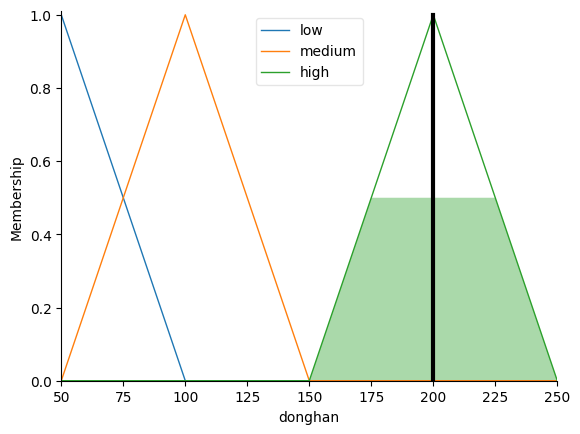

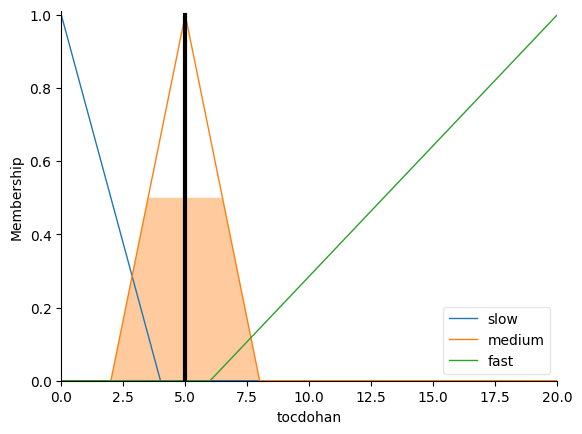

In [31]:
donghan_sim.input['doday'] = 25
donghan_sim.input['kichthuockheho'] = 5
donghan_sim.compute()

tocdo_sim.input['doday'] = 25
tocdo_sim.input['kichthuockheho'] = 5
tocdo_sim.compute()

print("Dòng hàn:", donghan_sim.output['donghan'])
print("Tốc độ hàn:", tocdo_sim.output['tocdohan'])

donghan.view(sim=donghan_sim)
tocdohan.view(sim=tocdo_sim)